In [ ]:
import pandas as pd

# Load the dataset from a local file with tab-separated values and set column names
file_path = "/content/fruit_data_with_colors.txt"
column_names = ['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height', 'color_score']
df = pd.read_csv(file_path, delimiter='\t', names=column_names)

# Display the first few rows to inspect the data
df.head()



,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
1,1,apple,granny_smith,192,8.4,7.3,0.55
2,1,apple,granny_smith,180,8.0,6.8,0.59
3,1,apple,granny_smith,176,7.4,7.2,0.60
4,2,mandarin,mandarin,86,6.2,4.7,0.80


In [ ]:
print(df.columns)


Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')


In [ ]:
print(df.dtypes)


fruit_label      object
fruit_name       object
fruit_subtype    object
mass             object
width            object
height           object
color_score      object
dtype: object


In [ ]:
# Convert numeric columns to numeric data types
numeric_columns = ['mass', 'width', 'height', 'color_score']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check data types again
print(df.dtypes)


fruit_label       object
fruit_name        object
fruit_subtype     object
mass             float64
width            float64
height           float64
color_score      float64
dtype: object


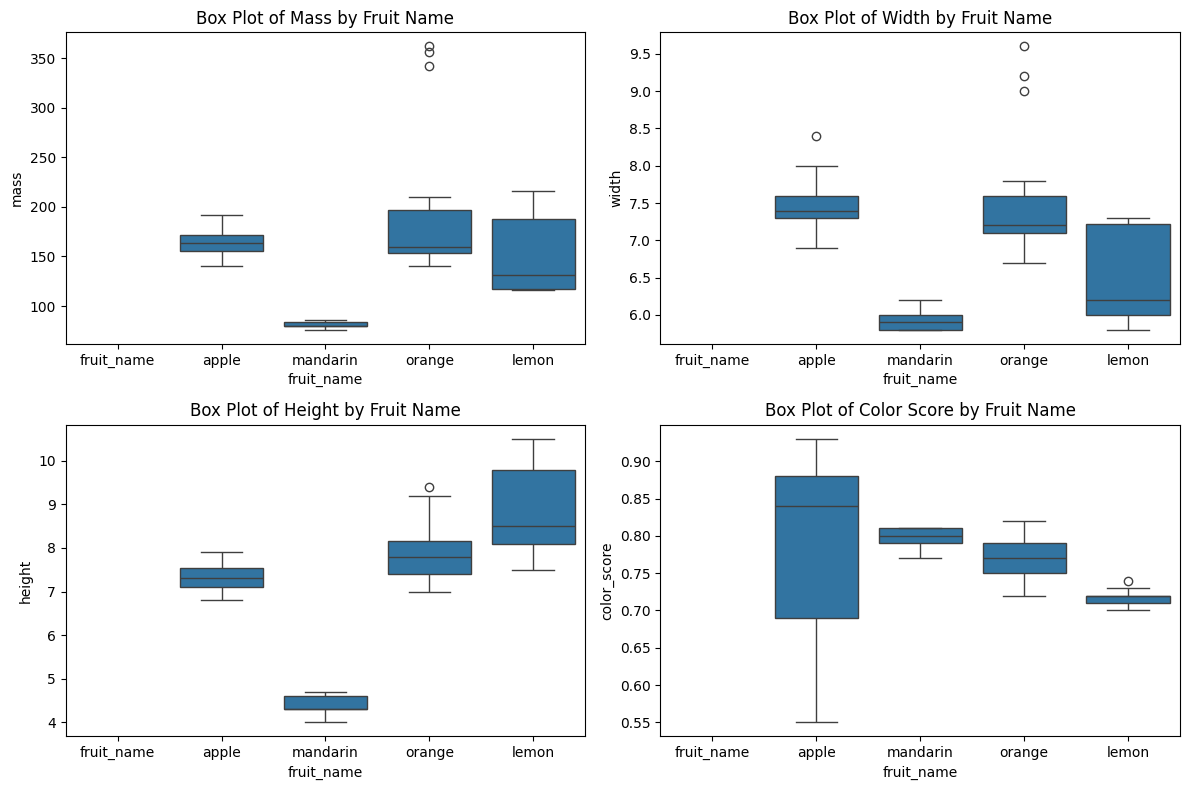

In [ ]:
#Exploratory Data Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots for each numeric feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Box plot of 'mass' by 'fruit_name'
sns.boxplot(x='fruit_name', y='mass', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Mass by Fruit Name')

# Box plot of 'width' by 'fruit_name'
sns.boxplot(x='fruit_name', y='width', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Width by Fruit Name')

# Box plot of 'height' by 'fruit_name'
sns.boxplot(x='fruit_name', y='height', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Height by Fruit Name')

# Box plot of 'color_score' by 'fruit_name'
sns.boxplot(x='fruit_name', y='color_score', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of Color Score by Fruit Name')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
#model selection
print(df.columns)


Index(['fruit_label', 'fruit_name', 'fruit_subtype', 'mass', 'width', 'height',
       'color_score'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split

# Clean up the dataframe by dropping the first row which contains headers as data
# and converting 'fruit_label' to numeric.
df = df.iloc[1:].copy()
df['fruit_label'] = pd.to_numeric(df['fruit_label'], errors='coerce')

# One-hot encode categorical features 'fruit_name' and 'fruit_subtype'
df_encoded = pd.get_dummies(df, columns=['fruit_name', 'fruit_subtype'], drop_first=True)

# Define X (features) and y (target) from the encoded dataframe
X = df_encoded.drop('fruit_label', axis=1)
y = df_encoded['fruit_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Include only relevant columns in y_train
y_train = df_encoded['fruit_label']

In [ ]:
# Exclude non-numeric columns (if necessary)
numeric_columns = X_train.select_dtypes(include=['number']).columns
X_train = X_train[numeric_columns]


In [ ]:
#Impute Missing Values
from sklearn.impute import SimpleImputer

# Create an imputer
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train)

# Now, you can use X_train_imputed for model training


In [ ]:
#Remove Rows with Missing Values
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]  # Update y_train to match the remaining rows


In [ ]:
#Model building
X_test = X_test[X_train.columns]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import joblib

# Create multiple ML models
models = [
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter=500)),
    ("SVM", SVC(random_state=42)),
    ("k-NN", KNeighborsClassifier(n_neighbors=5)),
    ("Naive Bayes", GaussianNB())
]

best_model = None
best_accuracy = 0

# Train each model and select the best one
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"{name} Accuracy:", acc)

    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

Decision Tree Accuracy: 0.8333333333333334
Random Forest Accuracy: 1.0
Logistic Regression Accuracy: 0.6666666666666666
SVM Accuracy: 0.5
k-NN Accuracy: 0.5
Naive Bayes Accuracy: 0.9166666666666666


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Save best model
joblib.dump(best_model, "fruit_color_model.pkl")
print("Best model saved as fruit_color_model.pkl")

Best model saved as fruit_color_model.pkl


In [ ]:
import cv2
import numpy as np
import joblib
import urllib.request

# --------------------------
# Load saved model
# --------------------------
model_path = "/content/fruit_color_model.pkl"
model = joblib.load(model_path)
print("Model Loaded Successfully!")


# --------------------------
# Download image from URL
# --------------------------
image_url = "https://example.com/yourimage.jpg"   # <-- PUT YOUR IMAGE LINK HERE

# Save temporary file
urllib.request.urlretrieve(image_url, "test_image.jpg")

# Load the image
image = cv2.imread("test_image.jpg")

if image is None:
    print("Failed to load image from URL!")
else:
    print("Image Loaded Successfully!")


# --------------------------
# Feature extraction (manual numeric values)
# --------------------------
def extract_numeric(mass, width, height, color_score):
    return np.array([[mass, width, height, color_score]])


# ✨ ENTER THE VALUES FOR THIS IMAGE
mass = 150
width = 7.5
height = 8.0
color_score = 0.82

features = extract_numeric(mass, width, height, color_score)

# --------------------------
# Predict
# --------------------------
prediction = model.predict(features)
print("Predicted Fruit Class:", prediction[0])


Model Loaded Successfully!
Predicted Fruit Class: 3


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
